In [4]:
%pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.loc[:,'salary_rate' : 'salary_hour_avg'].dropna(subset = 'salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [15]:
df.loc[0:10, 'salary_year_avg': 'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [18]:
median_salary_year = df['salary_year_avg'].median()

In [17]:
median_salary_hour = df['salary_hour_avg'].median()

In [25]:
df_filled = df 
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [26]:
df_filled.loc[:10, 'salary_year_avg': "salary_hour_avg"]

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [28]:
df_unique = df_filled
df_unique = df_unique.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        785741 non-null  floa

In [29]:
df_unique = df_filled.drop_duplicates(['job_title', 'company_name'])
print('original', len(df))
print('drop', len(df_unique))
print('rows dropped', len(df)-len(df_unique))

original 785741
drop 508042
rows dropped 277699


<Axes: xlabel='job_country'>

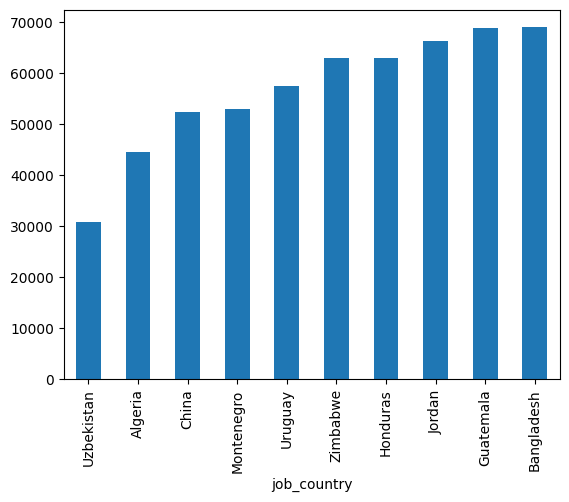

In [25]:
job_count = df['job_title_short'].value_counts()
median_avg_salary_year = df[['job_title_short', 'job_country', 'salary_year_avg']].dropna().groupby( 'job_country')['salary_year_avg'].median().sort_values().head(10)

median_avg_salary_year.plot(kind="bar")

In [38]:
top_countries = df['job_country'].value_counts().head(6).index.tolist()

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


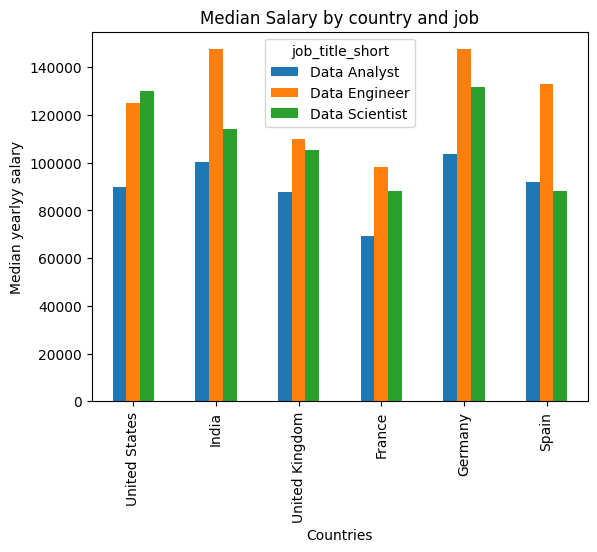

In [40]:
df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]
df_job_country_salary = df_job_country_salary[job_titles]


df_job_country_salary.plot(kind="bar")
plt.ylabel('Median yearlyy salary')
plt.xlabel('Countries')
plt.title('Median Salary by country and job')
plt.show()

In [58]:
top_countries = df['job_country'].value_counts().head(6).index.tolist()

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


<Axes: xlabel='job_posted_month'>

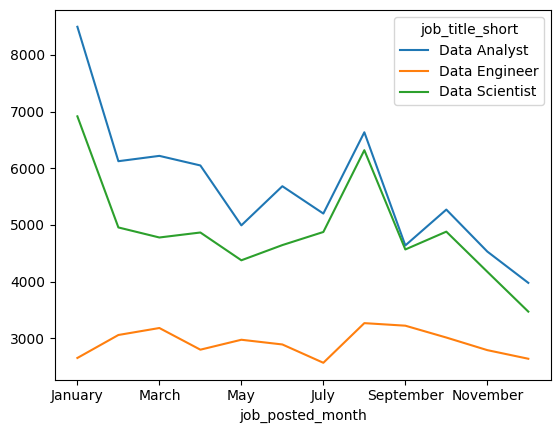

In [88]:
# Filter the DataFrame for entries in the United States
df_usa = df[df['job_country'] == 'United States'].copy()
# Add a new column for the month the job was posted

df_usa.loc[:, 'job_posted_month'] = df_usa['job_posted_date'].dt.month_name()


df_usa_pivot = df_usa.pivot_table(
    index = 'job_posted_month',
    columns = 'job_title_short',
    aggfunc='size'
).reset_index()

df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

# Sort by the numerical month
df_usa_pivot.sort_values('month_no', inplace=True)
df_usa_pivot.set_index('job_posted_month', inplace=True)

df_usa_pivot[['Data Analyst',	'Data Engineer',	'Data Scientist']].plot()


<Axes: xlabel='job_posted_month'>

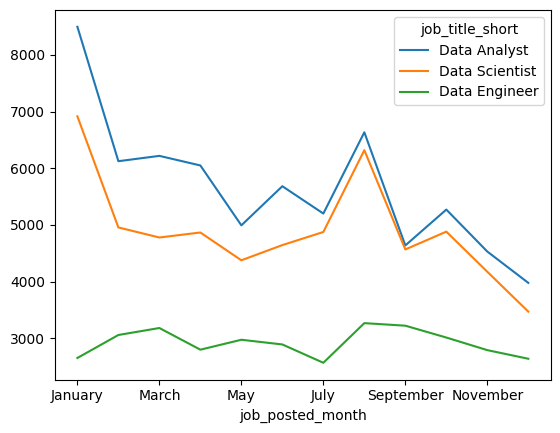

In [101]:
top3 = df_usa['job_title_short'].value_counts().head(3)
top3 = top3.index.tolist()
df_usa_pivot[top3].plot(kind="line")

0         United States
3         United States
5         United States
6         United States
9         United States
              ...      
785673    United States
785685    United States
785692    United States
785703    United States
785705    United States
Name: job_country, Length: 206292, dtype: object

In [1]:

df

NameError: name 'df' is not defined